In [1]:
# lecture 10 slide 8 multi percentron
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
# reproduceability
tf.set_random_seed(777)
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# input placeholder
X = tf.placeholder(tf.float32, [None,784])
Y = tf.placeholder(tf.float32,[None,10])

In [4]:
#tf.get_variable
W1 = tf.get_variable('W1',shape =[784,256],
                                 initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)

In [5]:
W2 = tf.get_variable('W2',shape = [256,256],
                     initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,W2)+b2)

In [6]:
W3 = tf.get_variable('W3', shape = [256,10],
                    initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3) + b3

In [7]:
# define parameters

learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples/batch_size)

In [8]:
# define cost/loss & optimizer

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels =Y))
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [10]:
## practice of parenthesis, ignore the duplication
cost = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(
            logits = hypothesis, labels = tf.stop_gradient(Y)
    )
)

In [11]:
correct_prediction = tf.equal(tf.argmax(hypothesis,axis = 1), tf.argmax(Y, axis = 1))

In [12]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

Epoch: 0001 cost = 0.324790400
Epoch: 0002 cost = 0.116782509
Epoch: 0003 cost = 0.077066399
Epoch: 0004 cost = 0.054720485
Epoch: 0005 cost = 0.041151248
Epoch: 0006 cost = 0.032021693
Epoch: 0007 cost = 0.023561912
Epoch: 0008 cost = 0.019129242
Epoch: 0009 cost = 0.016345287
Epoch: 0010 cost = 0.017286147
Epoch: 0011 cost = 0.011435987
Epoch: 0012 cost = 0.012268452
Epoch: 0013 cost = 0.009363391
Epoch: 0014 cost = 0.009429555
Epoch: 0015 cost = 0.009476044
Epoch: 0016 cost = 0.008083585
Epoch: 0017 cost = 0.009354948
Epoch: 0018 cost = 0.006453287
Epoch: 0019 cost = 0.007072513
Epoch: 0020 cost = 0.010019312
Epoch: 0021 cost = 0.005829419
Epoch: 0022 cost = 0.003198565
Epoch: 0023 cost = 0.010209583
Epoch: 0024 cost = 0.006612479
Epoch: 0025 cost = 0.004356579
Epoch: 0026 cost = 0.005003058
Epoch: 0027 cost = 0.007895843
Epoch: 0028 cost = 0.002410931
Epoch: 0029 cost = 0.004057266
Epoch: 0030 cost = 0.009490052
Epoch: 0031 cost = 0.005799032
Epoch: 0032 cost = 0.001971057
Epoch: 0

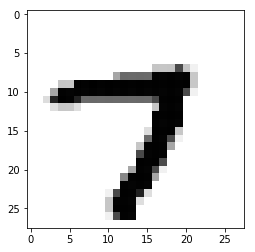

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for iteration in range(num_iterations):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,cost_val = sess.run([train,cost],feed_dict = {X:batch_xs,Y:batch_ys})
            avg_cost += cost_val/num_iterations
        print('Epoch:','%04d' % (epoch +1), 'cost =', '{:.9f}'.format(avg_cost))
    print('learning finished')
    print(
        'accuracy',sess.run(accuracy,feed_dict = {X:mnist.test.images,Y:mnist.test.labels}))
    r = random.randint(0,mnist.test.num_examples -1)
    print('label:',sess.run(tf.argmax(mnist.test.labels[r:r+1],axis = 1)))
    print(
    'prediction:',sess.run(tf.argmax(hypothesis,axis =1),feed_dict = {X:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap ='Greys',interpolation='nearest')
    plt.show()